#### With LSTM

Epoch 1/100
28/28 [==============================] - 2s 17ms/step - loss: 0.2218 - val_loss: 0.0989
Epoch 2/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0857 - val_loss: 0.0829
Epoch 3/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0801 - val_loss: 0.0793
Epoch 4/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0780 - val_loss: 0.0779
Epoch 5/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0770 - val_loss: 0.0772
Epoch 6/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0766 - val_loss: 0.0770
Epoch 7/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0765 - val_loss: 0.0770
Epoch 8/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0766 - val_loss: 0.0772
Epoch 9/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0766 - val_loss: 0.0770
Epoch 10/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0765 - val_loss: 0.0770
Epoch 11

28/28 [==============================] - 0s 6ms/step - loss: 0.0766 - val_loss: 0.0770
Epoch 84/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0765 - val_loss: 0.0772
Epoch 85/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0766 - val_loss: 0.0770
Epoch 86/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0766 - val_loss: 0.0771
Epoch 87/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0766 - val_loss: 0.0770
Epoch 88/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0765 - val_loss: 0.0770
Epoch 89/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0765 - val_loss: 0.0770
Epoch 90/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0765 - val_loss: 0.0771
Epoch 91/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0766 - val_loss: 0.0772
Epoch 92/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0767 - val_loss: 0.0771
Epoch 93/100


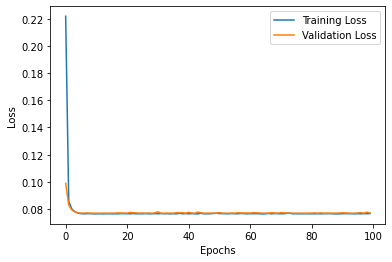

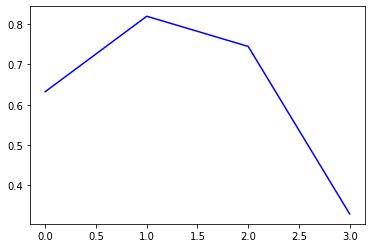

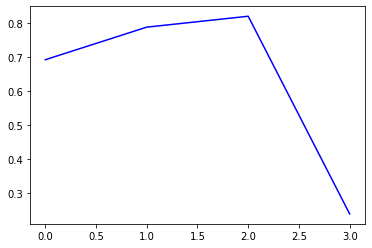

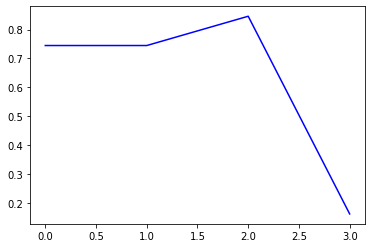

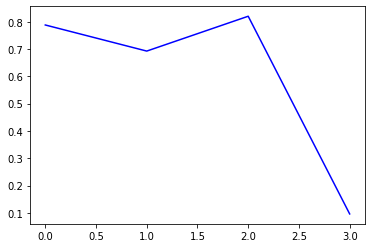

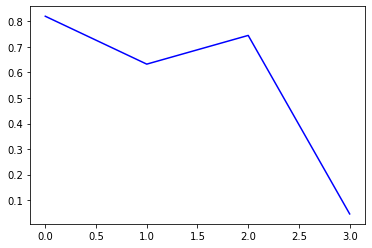

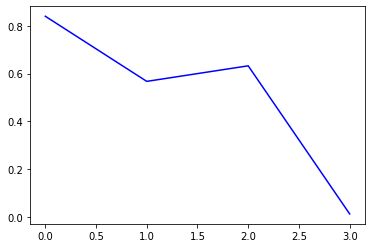

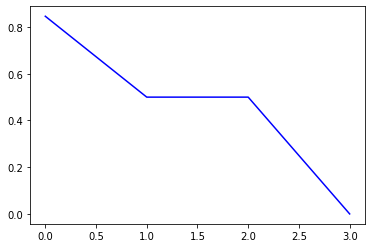

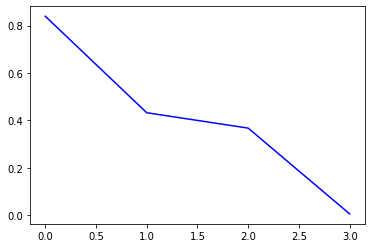

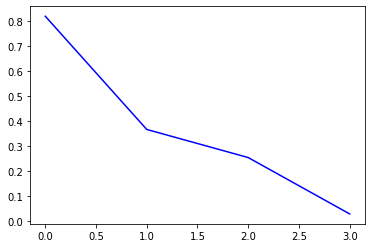

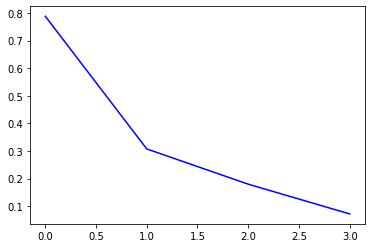

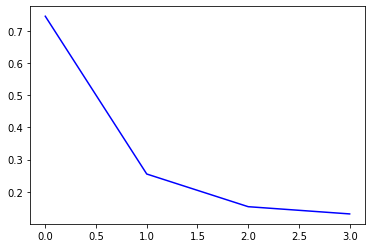

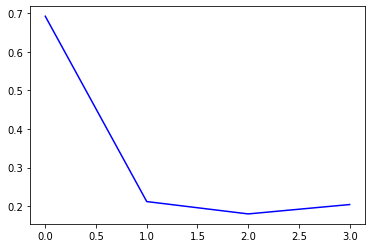

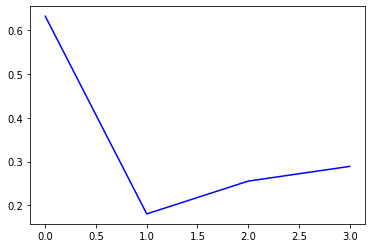

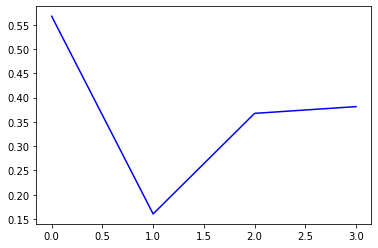

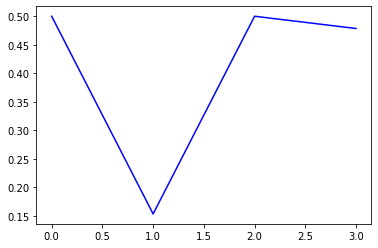

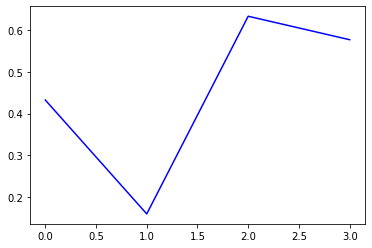

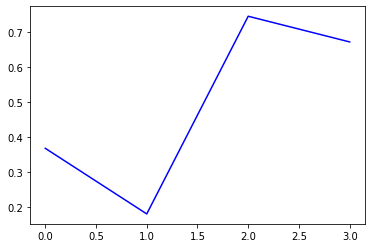

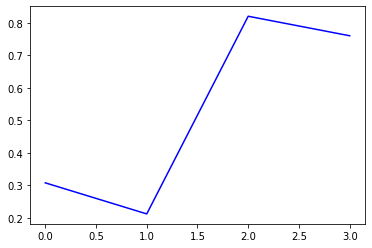

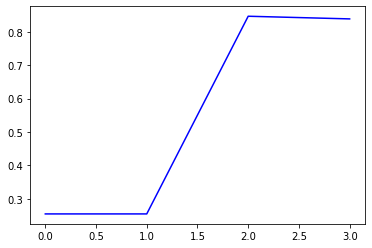

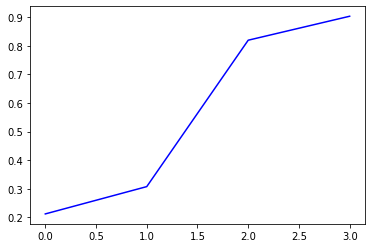

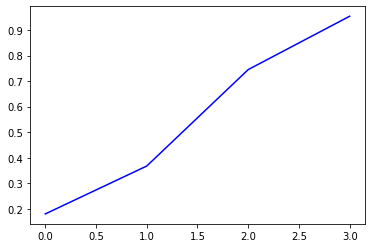

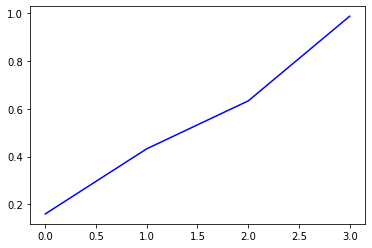

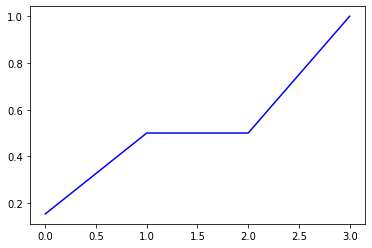

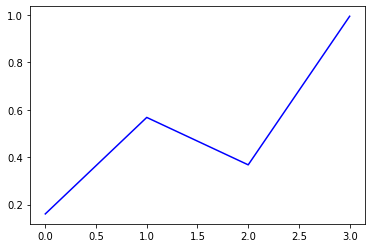

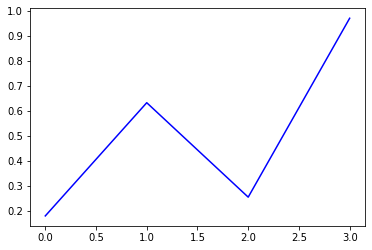

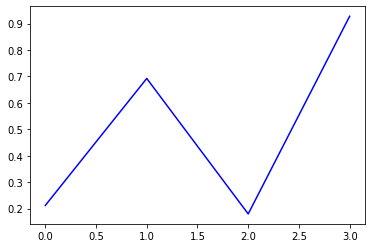

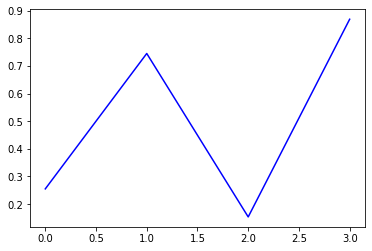

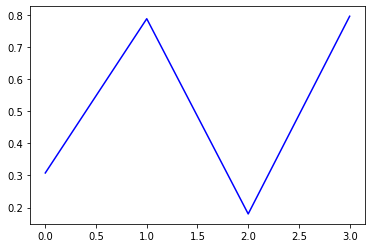

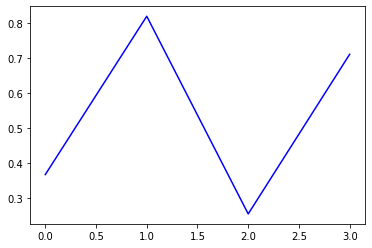

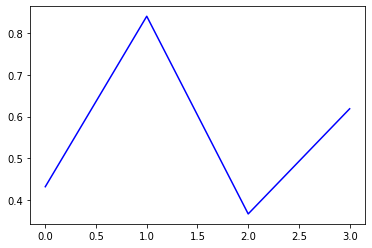

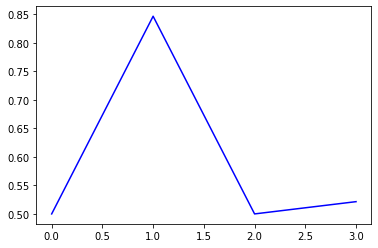

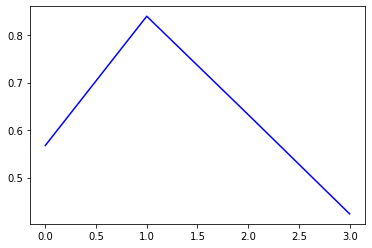

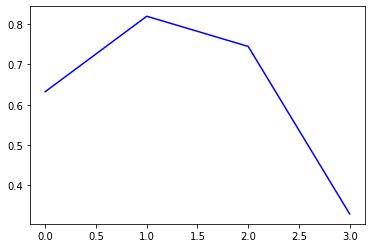

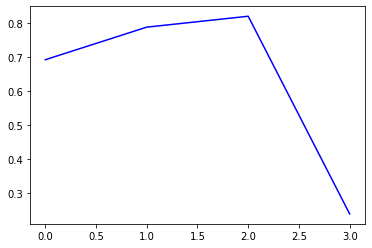

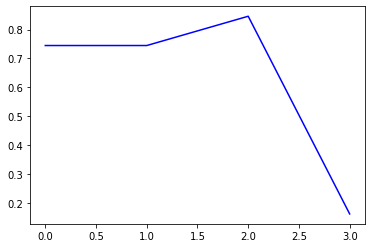

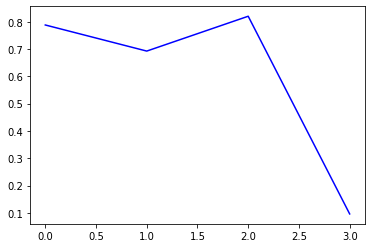

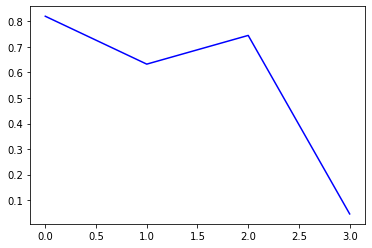

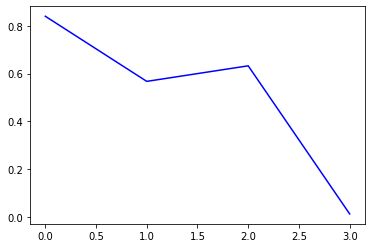

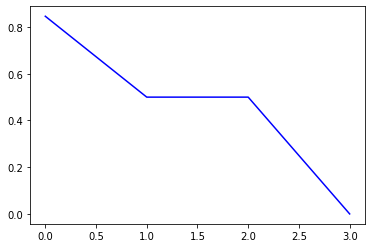

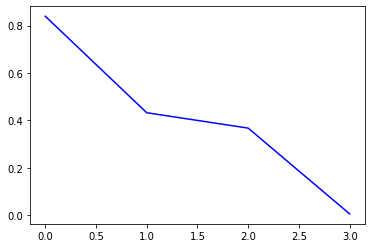

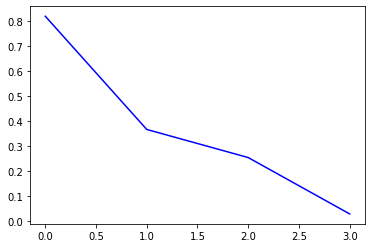

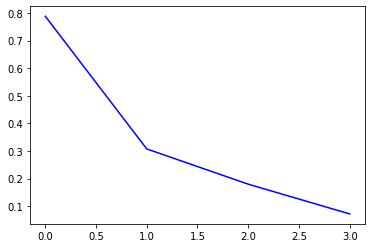

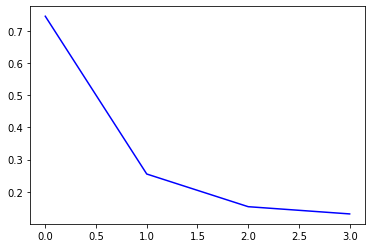

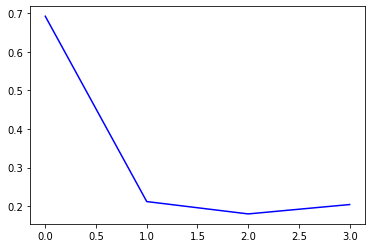

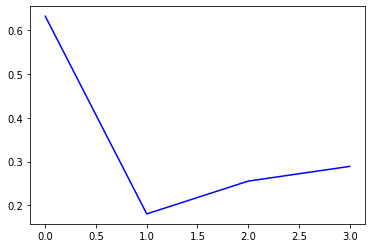

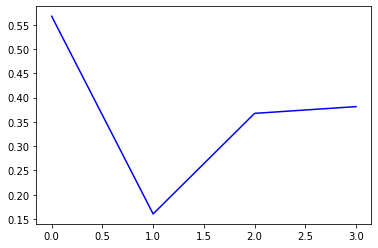

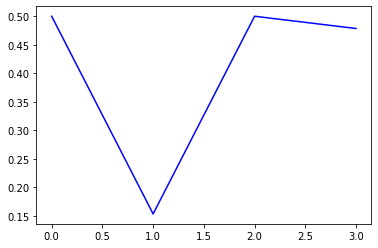

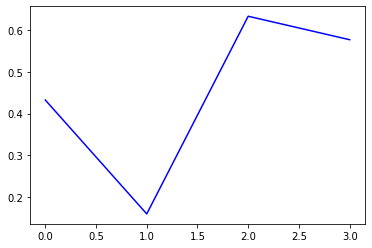

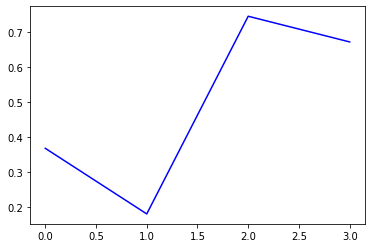

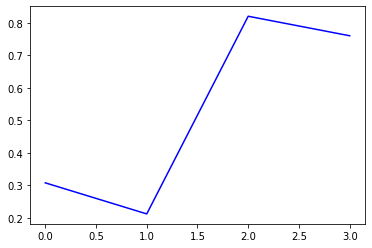

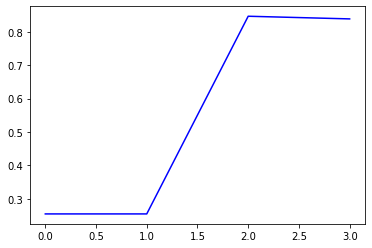

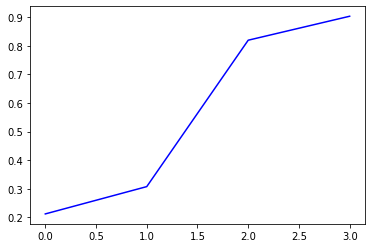

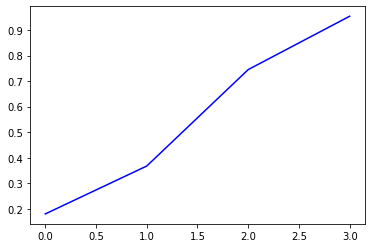

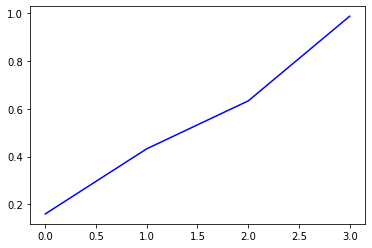

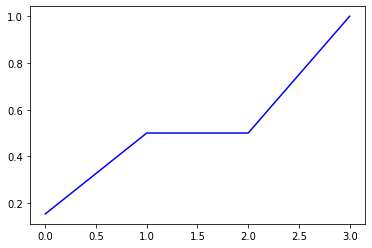

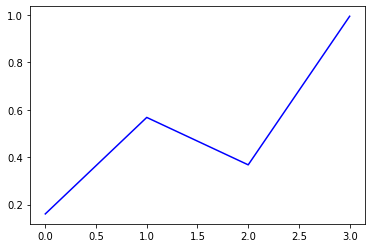

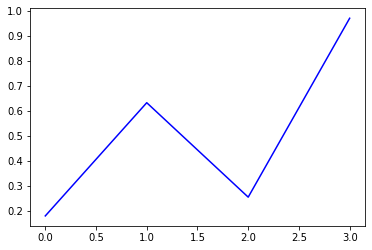

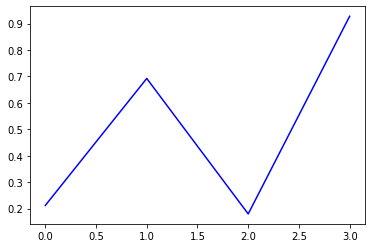

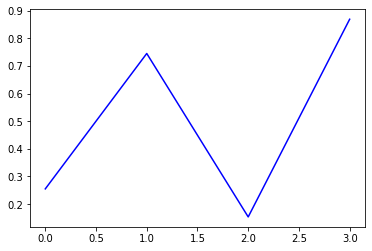

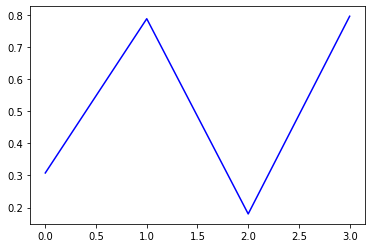

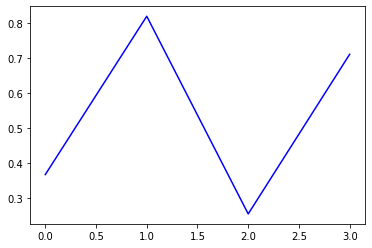

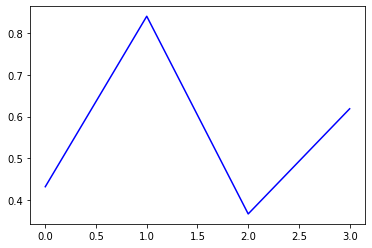

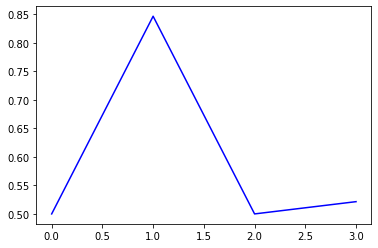

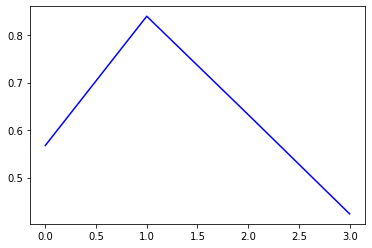

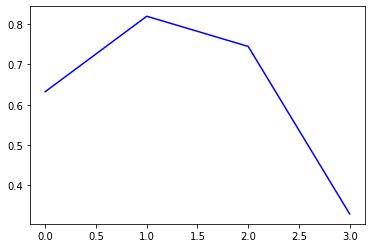

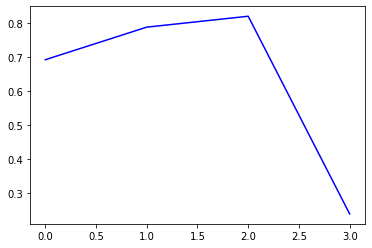

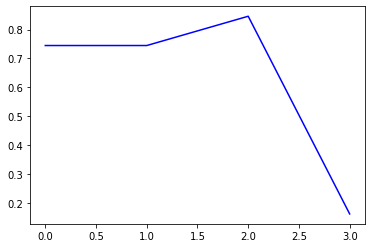

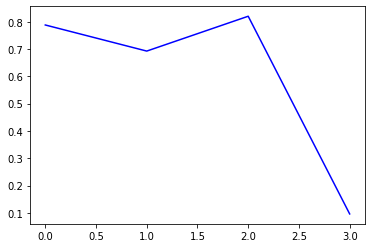

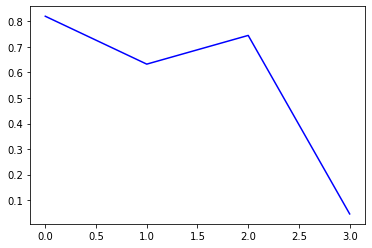

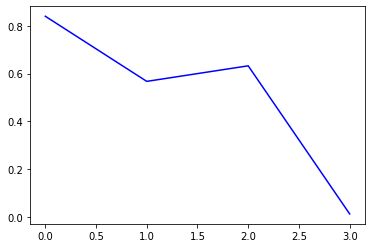

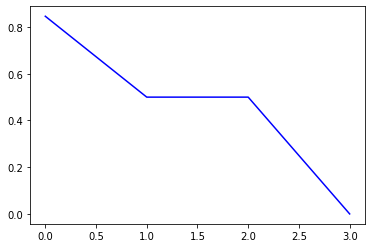

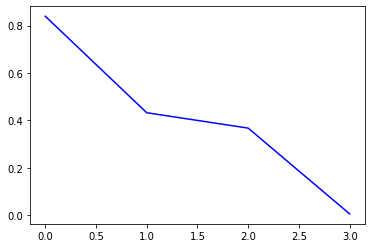

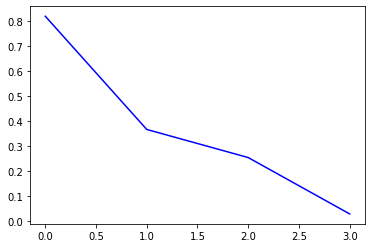

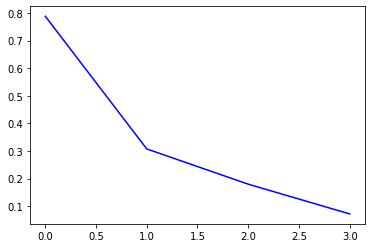

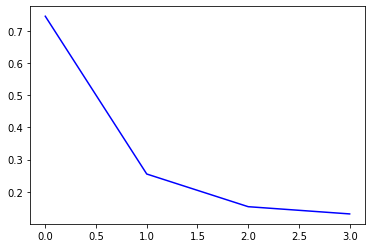

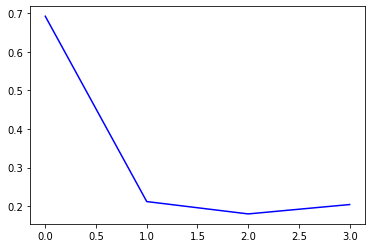

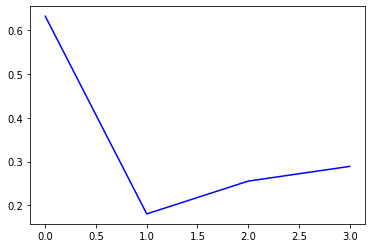

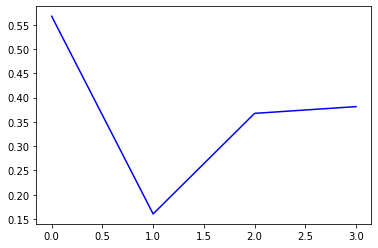

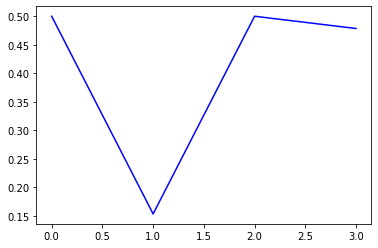

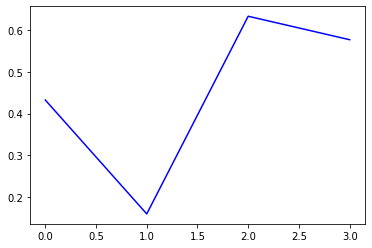

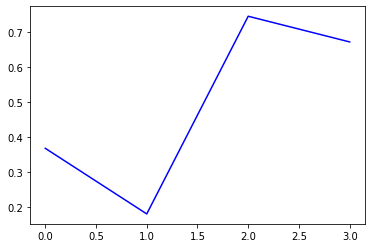

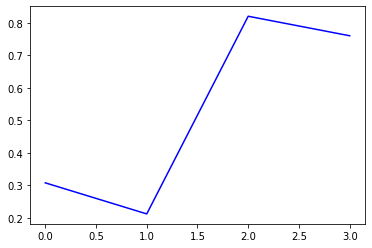

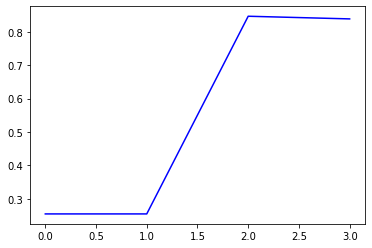

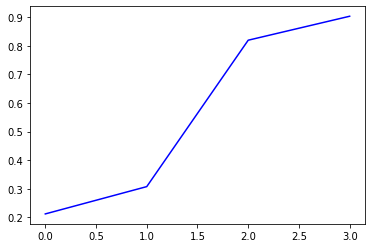

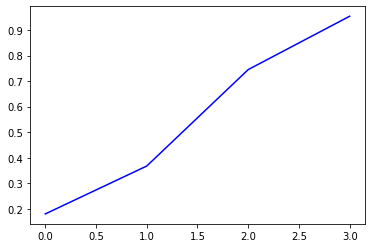

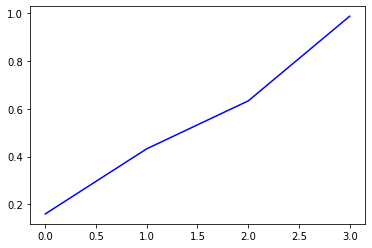

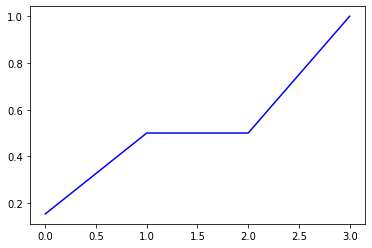

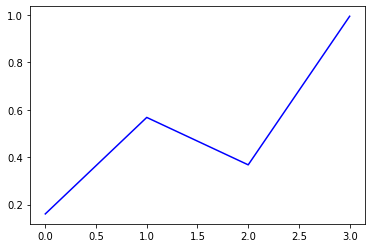

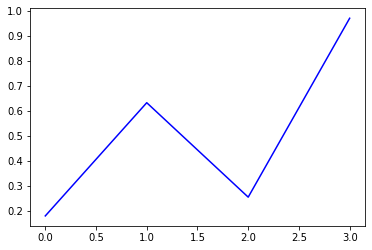

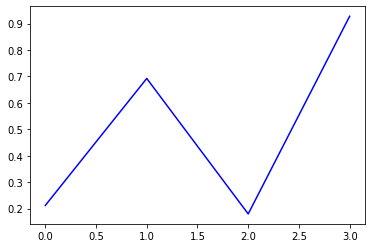

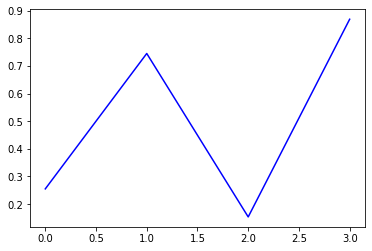

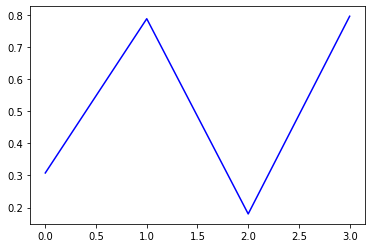

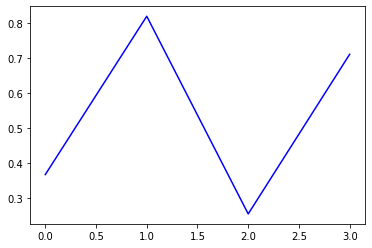

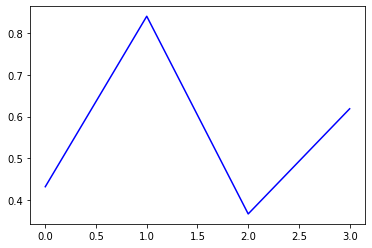

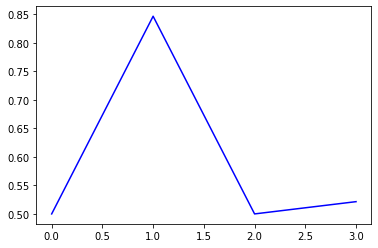

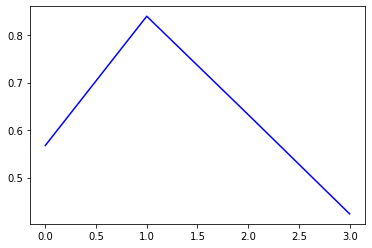

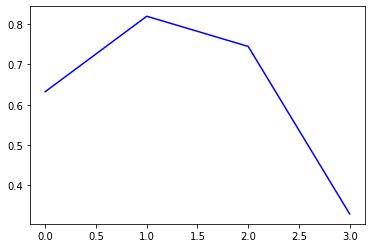

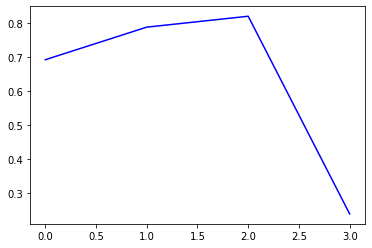

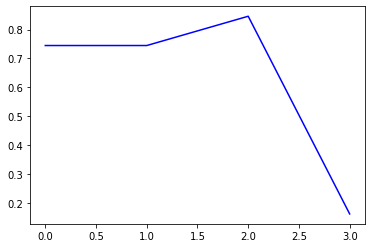

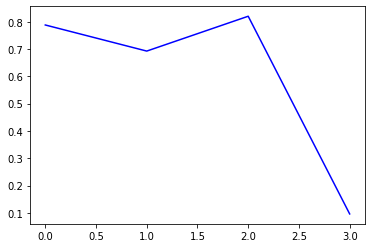

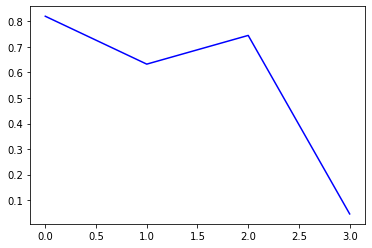

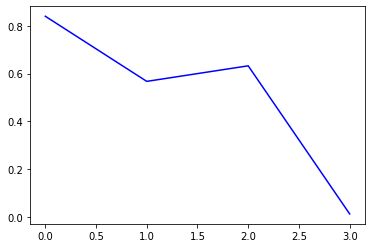

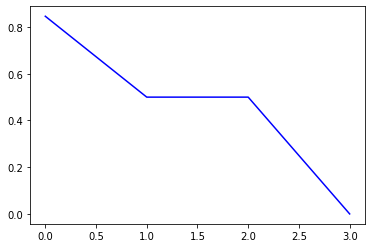

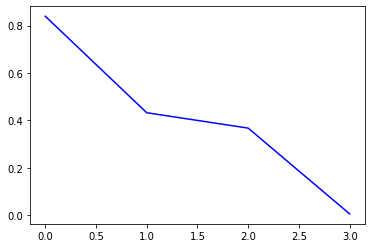

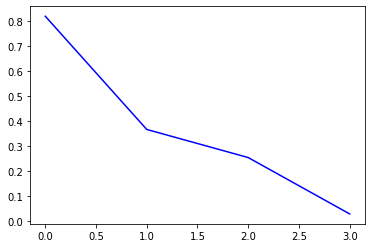

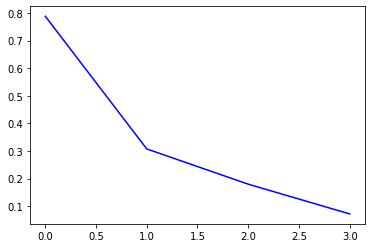

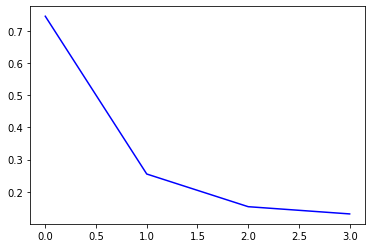

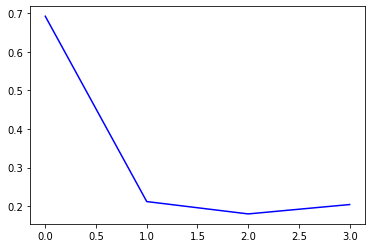

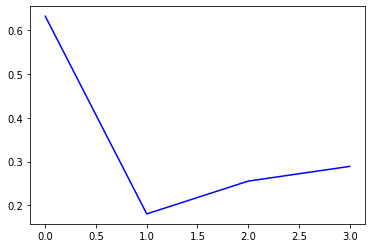

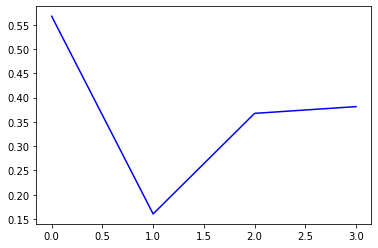

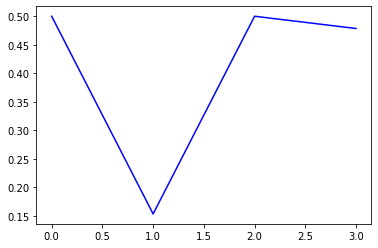

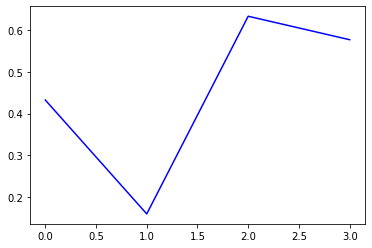

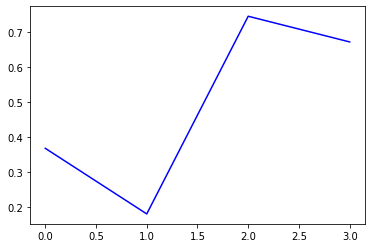

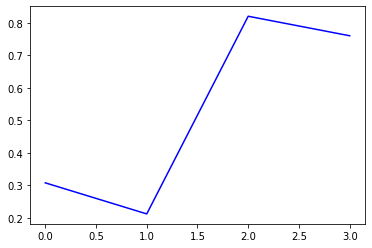

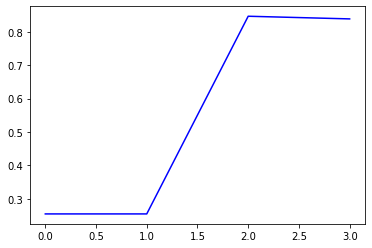

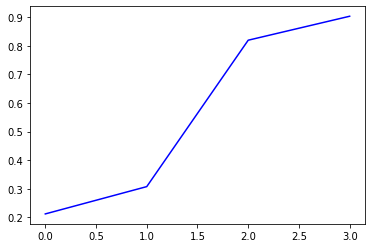

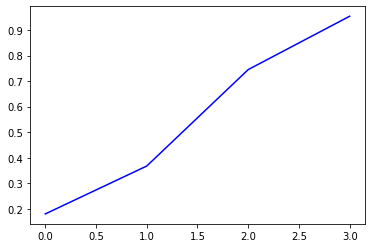

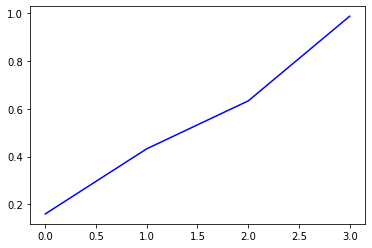

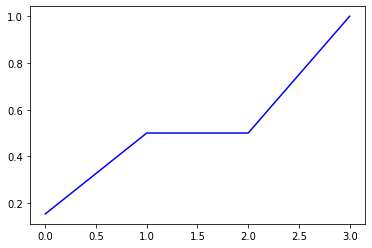

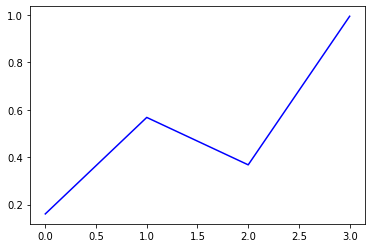

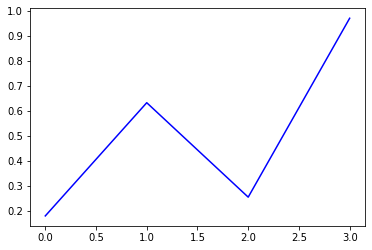

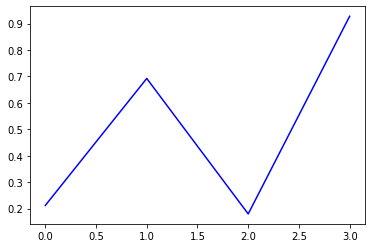

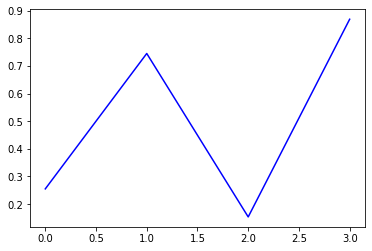

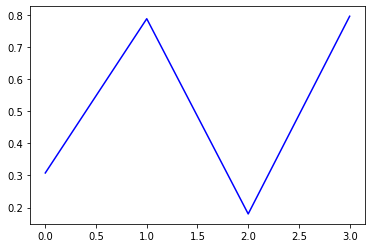

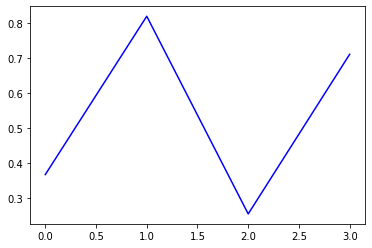

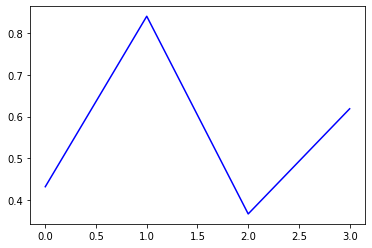

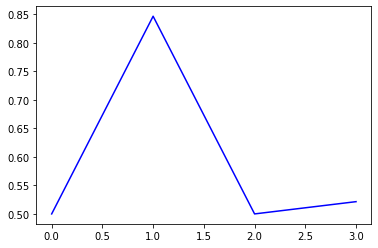

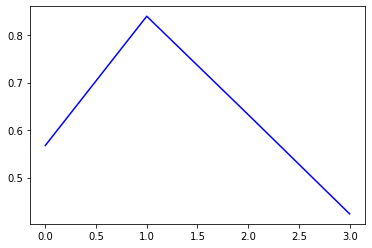

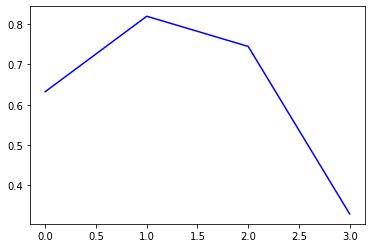

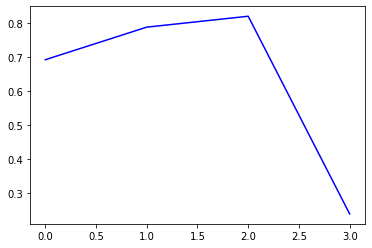

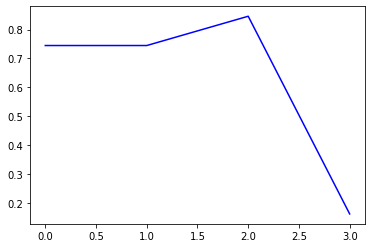

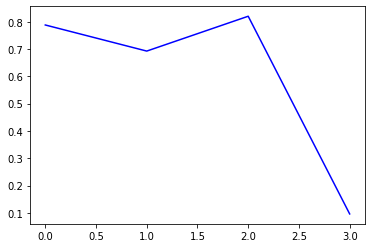

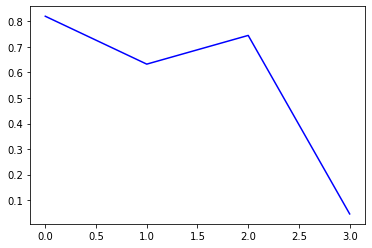

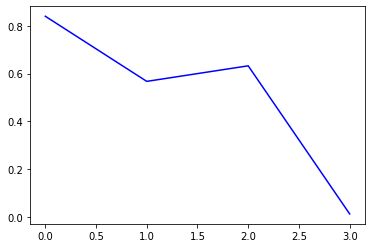

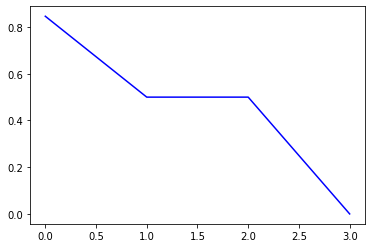

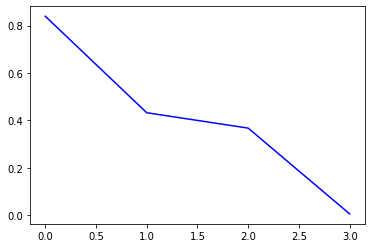

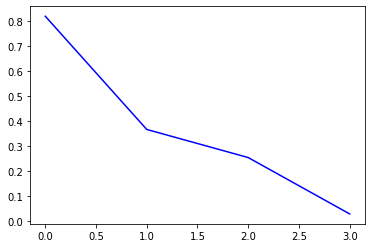

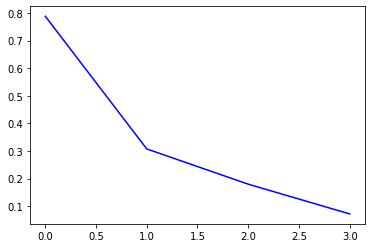

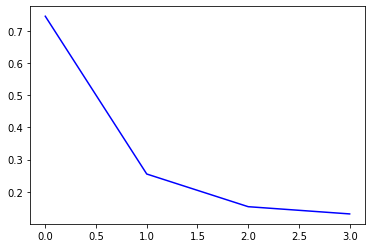

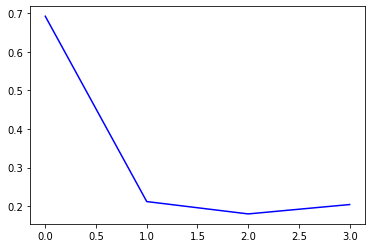

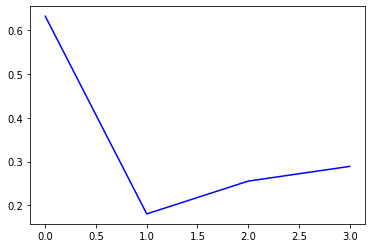

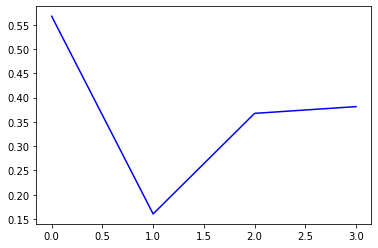

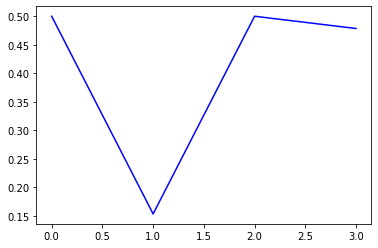

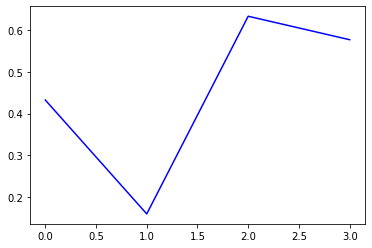

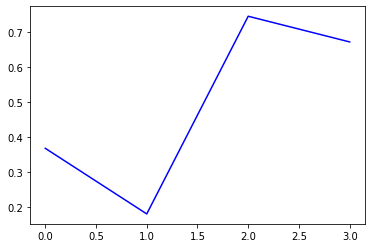

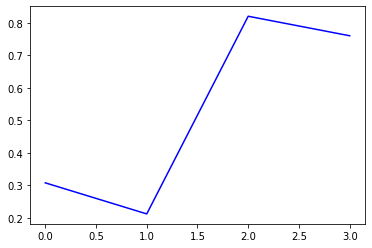

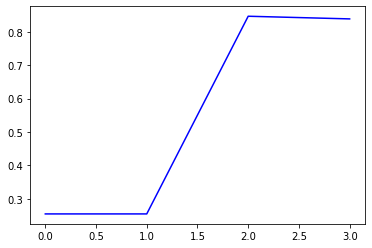

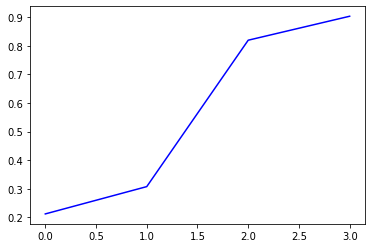

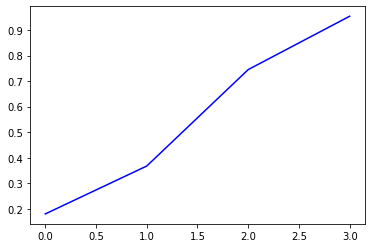

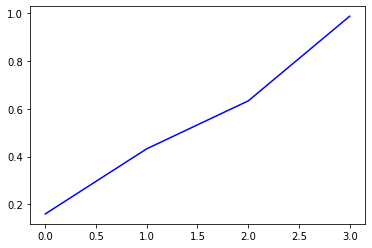

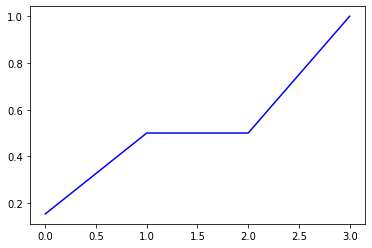

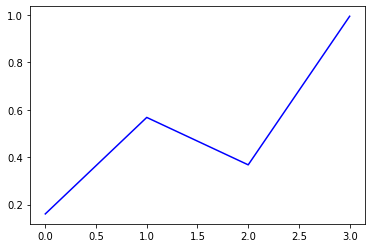

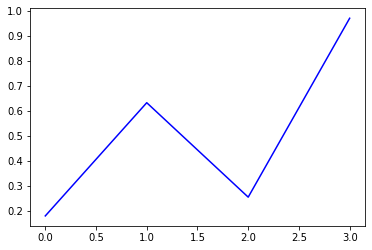

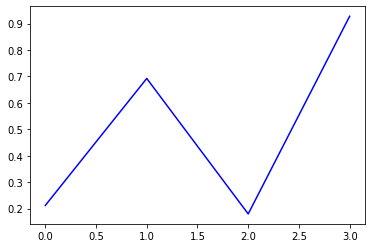

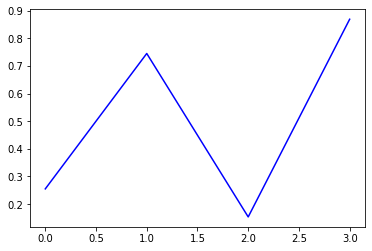

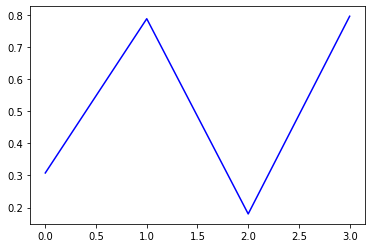

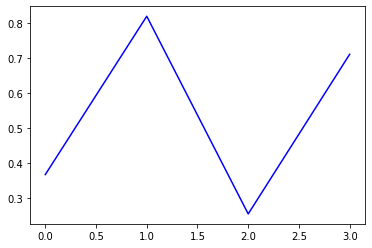

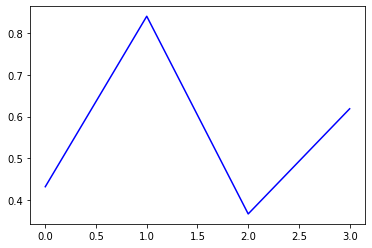

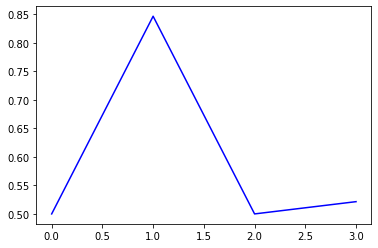

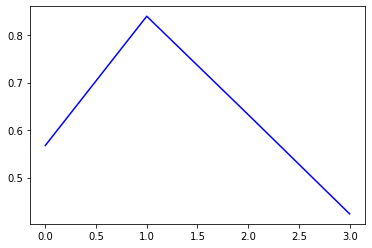

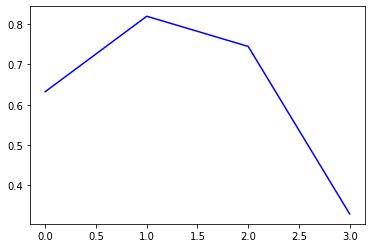

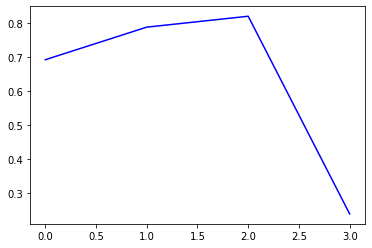

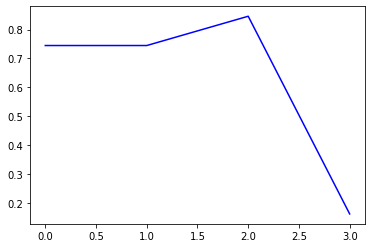

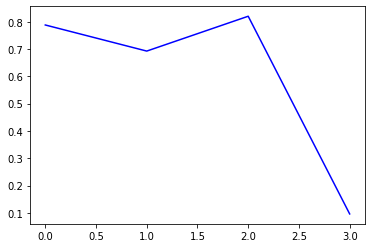

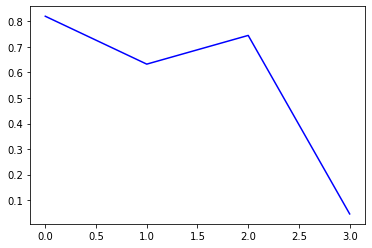

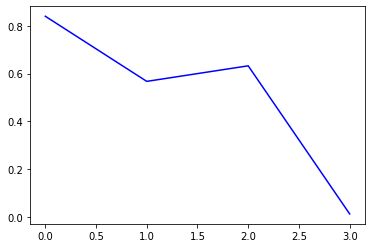

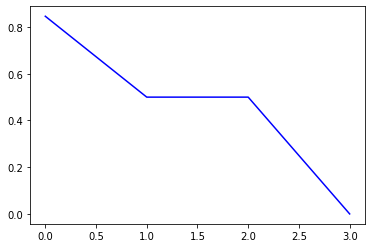

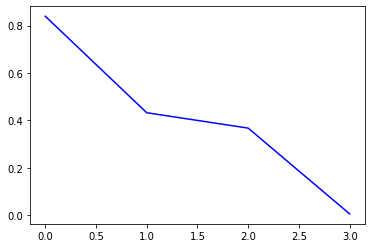

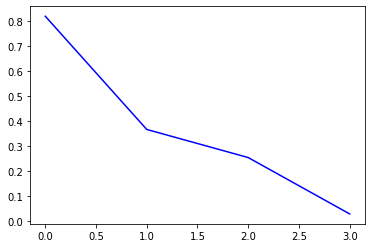

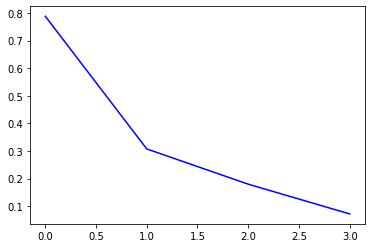

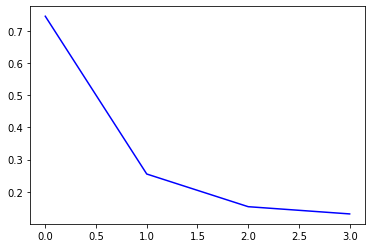

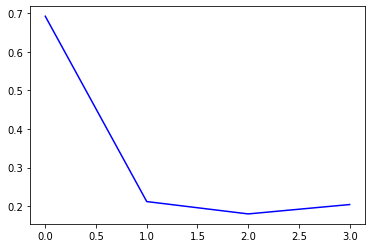

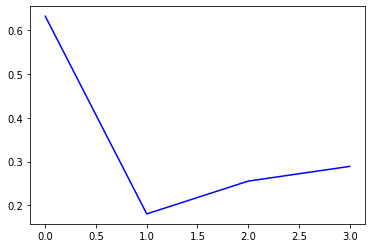

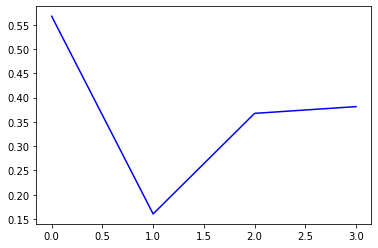

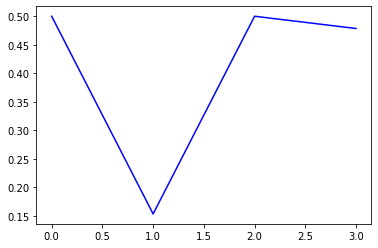

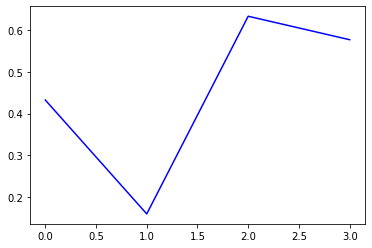

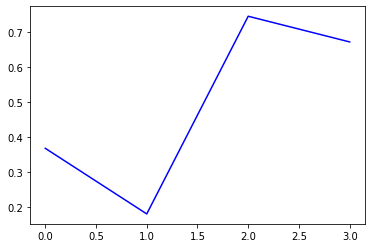

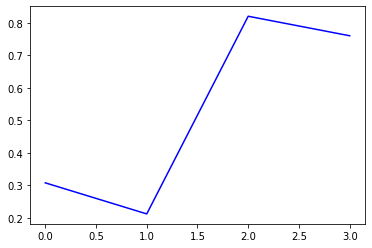

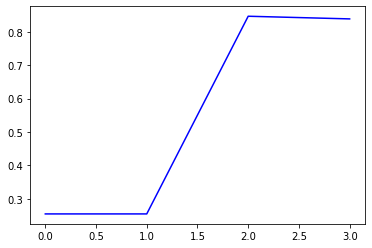

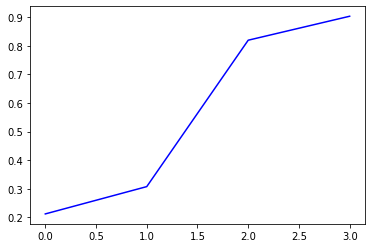

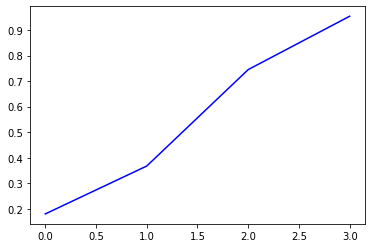

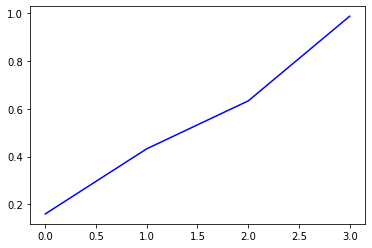

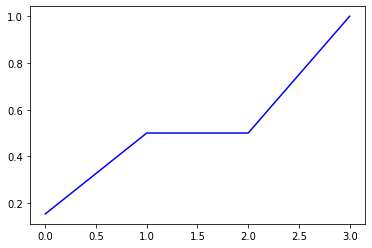

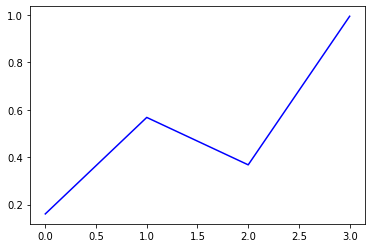

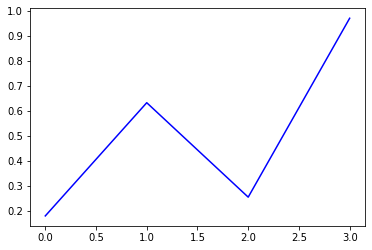

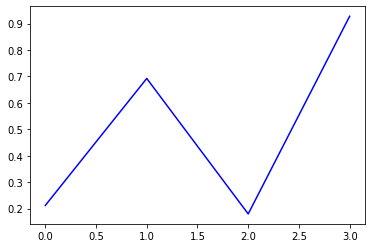

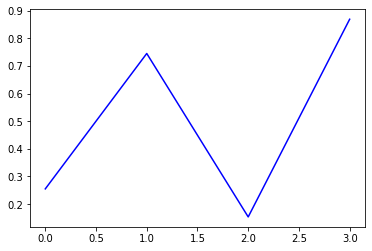

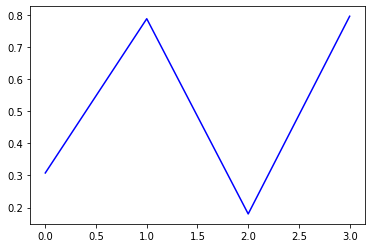

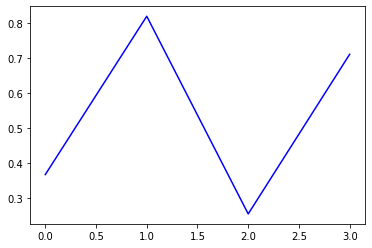

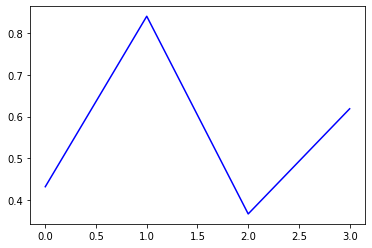

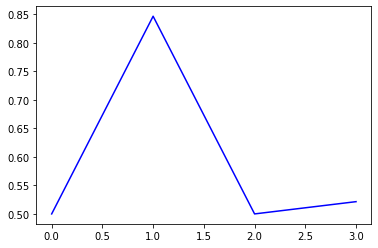

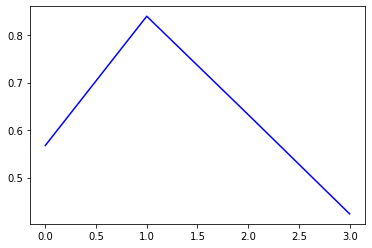

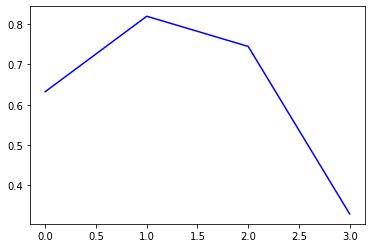

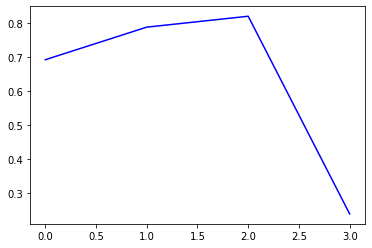

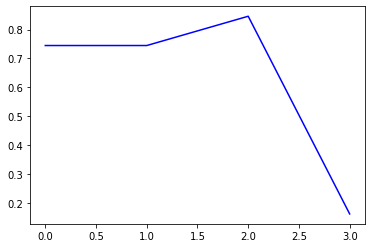

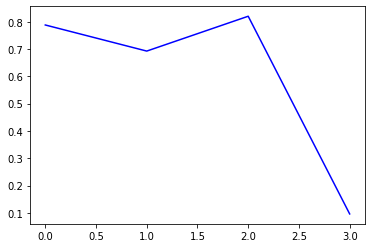

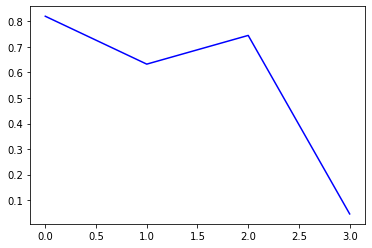

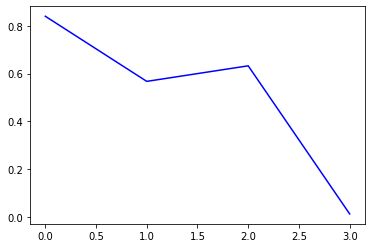

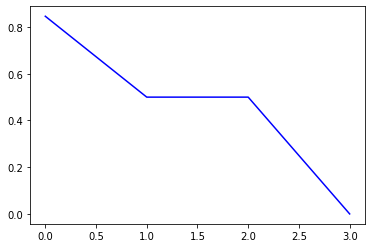

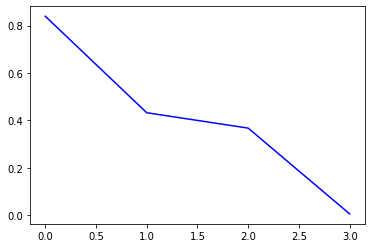

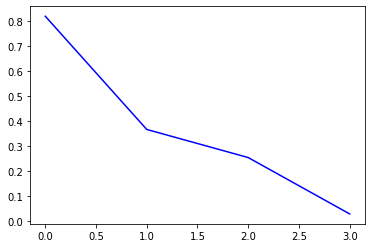

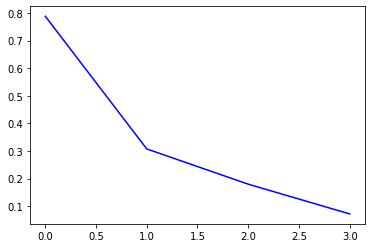

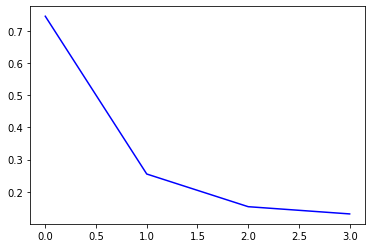

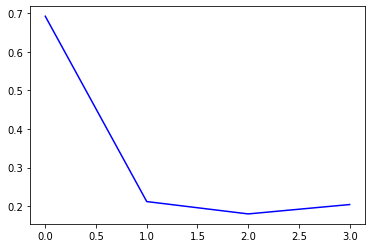

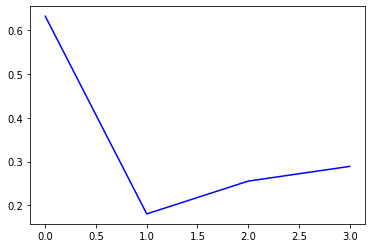

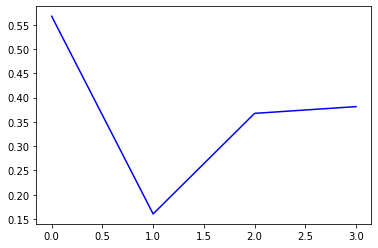

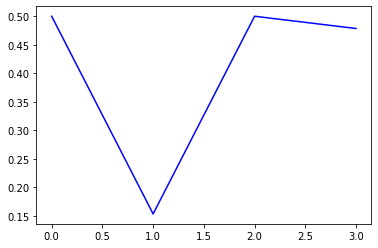

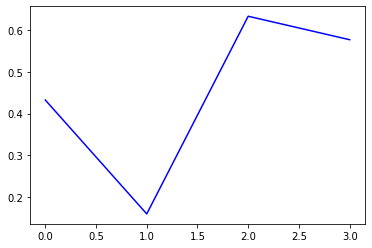

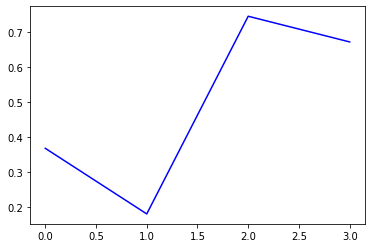

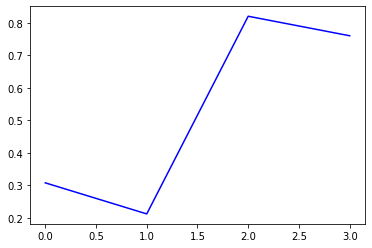

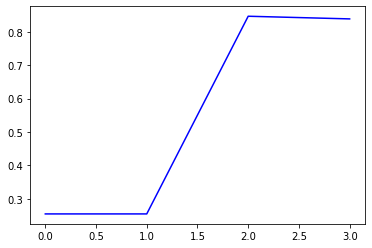

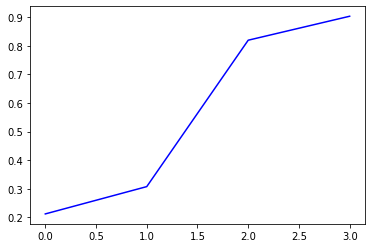

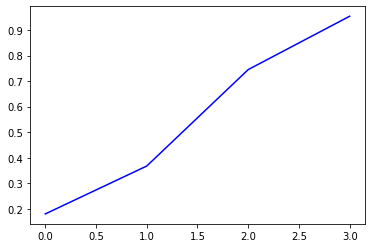

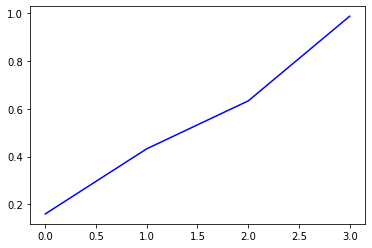

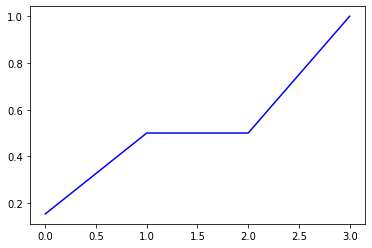

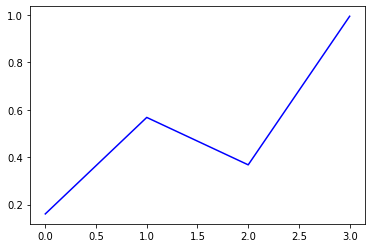

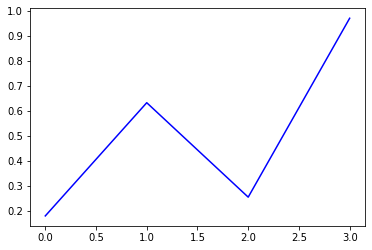

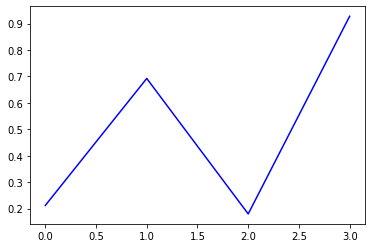

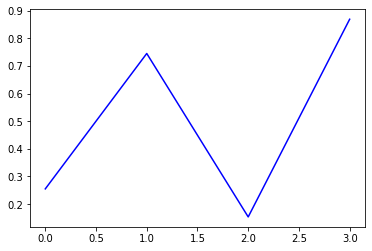

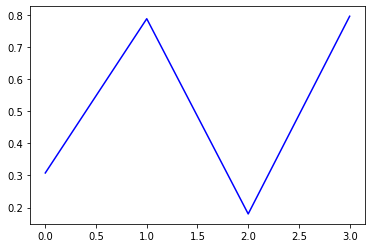

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the dataset
data = pd.read_csv('trig.csv', header=0, index_col=0)

# Define the number of time steps to look back and predict the future
n_steps = 3
n_future = 1

# Split the dataset into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Normalize the dataset
max_value = train_data.max().max()
min_value = train_data.min().min()
train_data = (train_data - min_value) / (max_value - min_value)
test_data = (test_data - min_value) / (max_value - min_value)

# Define the input and output data for the RNN
def create_dataset(data, n_steps, n_future):
    X, y = [], []
    for i in range(len(data) - n_steps - n_future):
        X.append(data.iloc[i:(i+n_steps), :].values)
        y.append(data.iloc[(i+n_steps):(i+n_steps+n_future), :].values)
    return np.array(X), np.array(y)

train_X, train_y = create_dataset(train_data, n_steps, n_future)
test_X, test_y = create_dataset(test_data, n_steps, n_future)

# Define the RNN model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, train_X.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(n_future))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y))

# Plot the loss history during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test data
predictions = model.predict(test_X)

# Plot the predicted and actual values
for i in range(test_X.shape[0]):
#     plt.plot(np.arange(n_steps+n_future), np.append(test_X[i,-1,:], test_y[i,0,:], axis=), color='blue')
#     plt.plot(np.arange(n_steps+n_future), np.append(test_X[i,-1,:], predictions[i,:]), color='red')
    
    plt.plot(np.arange(n_steps+n_future), test_X[i,-1,:], color='blue')
#     plt.plot(np.arange(n_steps+n_future), test_X[i,-1,:], predictions[i,:]), color='red')
    
    plt.show()


In [25]:
test_X.shape[0]

220

In [30]:
np.append(test_X[1,-1,:], test_y[1,0,:])

array([0.6923975 , 0.78794321, 0.81994535, 0.24007746, 0.74487557,
       0.74487557, 0.84630635, 0.16163748])

In [19]:
train_size

896

Epoch 1/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0956 - root_mean_squared_error: 0.3092 - val_loss: 0.0767 - val_root_mean_squared_error: 0.2769
Epoch 2/100
32/32 [==============================] - 0s 14ms/step - loss: 0.0886 - root_mean_squared_error: 0.2976 - val_loss: 0.0766 - val_root_mean_squared_error: 0.2768
Epoch 3/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0862 - root_mean_squared_error: 0.2935 - val_loss: 0.0783 - val_root_mean_squared_error: 0.2799
Epoch 4/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0855 - root_mean_squared_error: 0.2924 - val_loss: 0.0734 - val_root_mean_squared_error: 0.2710
Epoch 5/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0832 - root_mean_squared_error: 0.2884 - val_loss: 0.0752 - val_root_mean_squared_error: 0.2742
Epoch 6/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0833 - root_mean_squared_error: 0.2887 - val_loss: 0.0774 - val_

32/32 [==============================] - 0s 12ms/step - loss: 0.0036 - root_mean_squared_error: 0.0597 - val_loss: 0.1296 - val_root_mean_squared_error: 0.3600
Epoch 49/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0032 - root_mean_squared_error: 0.0566 - val_loss: 0.1214 - val_root_mean_squared_error: 0.3485
Epoch 50/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0028 - root_mean_squared_error: 0.0534 - val_loss: 0.1260 - val_root_mean_squared_error: 0.3550
Epoch 51/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0028 - root_mean_squared_error: 0.0524 - val_loss: 0.1169 - val_root_mean_squared_error: 0.3419
Epoch 52/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0031 - root_mean_squared_error: 0.0553 - val_loss: 0.1136 - val_root_mean_squared_error: 0.3370
Epoch 53/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0022 - root_mean_squared_error: 0.0469 - val_loss: 0.1216 - val_root_me

32/32 [==============================] - 0s 13ms/step - loss: 0.0023 - root_mean_squared_error: 0.0481 - val_loss: 0.1280 - val_root_mean_squared_error: 0.3578
Epoch 96/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0024 - root_mean_squared_error: 0.0491 - val_loss: 0.1189 - val_root_mean_squared_error: 0.3448
Epoch 97/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0026 - root_mean_squared_error: 0.0510 - val_loss: 0.1168 - val_root_mean_squared_error: 0.3418
Epoch 98/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0032 - root_mean_squared_error: 0.0566 - val_loss: 0.1212 - val_root_mean_squared_error: 0.3482
Epoch 99/100
32/32 [==============================] - 0s 14ms/step - loss: 0.0032 - root_mean_squared_error: 0.0562 - val_loss: 0.1217 - val_root_mean_squared_error: 0.3488
Epoch 100/100
32/32 [==============================] - 0s 14ms/step - loss: 0.0050 - root_mean_squared_error: 0.0709 - val_loss: 0.1262 - val_root_m

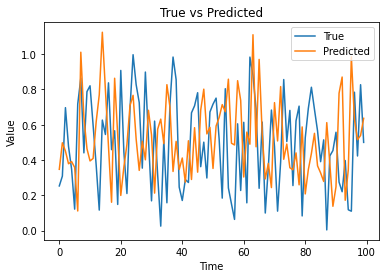

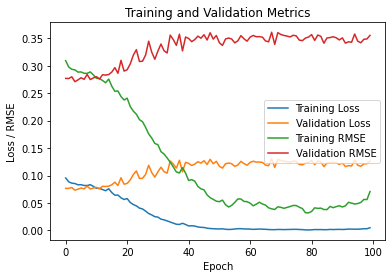

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# define the number of time steps in each input sequence
n_steps = 50

# define the number of features in the input sequences
n_features = 2

# define the number of neurons in the RNN layer
n_neurons = 100

# define the number of output values
n_outputs = 1

# define the learning rate for the optimizer
learning_rate = 0.001

# define the number of training epochs
n_epochs = 100

# define the batch size
batch_size = 32

# generate sample data for training and testing
# x_train and x_test are arrays of shape (n_samples, n_steps, n_features)
# y_train and y_test are arrays of shape (n_samples, n_outputs)
x_train = np.random.rand(1000, n_steps, n_features)
y_train = np.random.rand(1000, n_outputs)
x_test = np.random.rand(100, n_steps, n_features)
y_test = np.random.rand(100, n_outputs)

# define the RNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(n_steps, n_features)),
    tf.keras.layers.SimpleRNN(n_neurons, activation='relu'),
    tf.keras.layers.Dense(n_outputs)
])

# compile the model with an optimizer, loss function, and evaluation metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

# train the model on the training data
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_test, y_test))

# make predictions on the test data
y_pred = model.predict(x_test)

# plot the predictions against the true values
plt.figure()
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('True vs Predicted')
plt.show()

# plot the loss and RMSE for the training and validation data over the epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss / RMSE')
plt.title('Training and Validation Metrics')
plt.show()


### For older version of keras

Epoch 1/100
32/32 [==============================] - ETA: 0s - loss: 0.0929 - root_mean_squared_error: 0.3047

Exception ignored in: <function EagerResourceDeleter.__del__ at 0x000002679EF24700>
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 289, in __del__
    gen_resource_variable_ops.destroy_resource_op(
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\ops\gen_resource_variable_ops.py", line 251, in destroy_resource_op
    _result = pywrap_tfe.TFE_Py_FastPathExecute(
KeyboardInterrupt: 


32/32 [==============================] - 3s 59ms/step - loss: 0.0929 - root_mean_squared_error: 0.3047 - val_loss: 0.1063 - val_root_mean_squared_error: 0.3261
Epoch 2/100
32/32 [==============================] - 0s 14ms/step - loss: 0.0864 - root_mean_squared_error: 0.2939 - val_loss: 0.0908 - val_root_mean_squared_error: 0.3013
Epoch 3/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0837 - root_mean_squared_error: 0.2893 - val_loss: 0.0923 - val_root_mean_squared_error: 0.3038
Epoch 4/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0821 - root_mean_squared_error: 0.2865 - val_loss: 0.0890 - val_root_mean_squared_error: 0.2983
Epoch 5/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0816 - root_mean_squared_error: 0.2856 - val_loss: 0.0985 - val_root_mean_squared_error: 0.3138
Epoch 6/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0824 - root_mean_squared_error: 0.2871 - val_loss: 0.0873 - val_root_mean_sq

32/32 [==============================] - 0s 13ms/step - loss: 0.0011 - root_mean_squared_error: 0.0338 - val_loss: 0.1147 - val_root_mean_squared_error: 0.3386
Epoch 49/100
32/32 [==============================] - 0s 13ms/step - loss: 9.6128e-04 - root_mean_squared_error: 0.0310 - val_loss: 0.1141 - val_root_mean_squared_error: 0.3379
Epoch 50/100
32/32 [==============================] - 0s 13ms/step - loss: 6.2194e-04 - root_mean_squared_error: 0.0249 - val_loss: 0.1171 - val_root_mean_squared_error: 0.3421
Epoch 51/100
32/32 [==============================] - 0s 13ms/step - loss: 6.7650e-04 - root_mean_squared_error: 0.0260 - val_loss: 0.1171 - val_root_mean_squared_error: 0.3421
Epoch 52/100
32/32 [==============================] - 0s 13ms/step - loss: 7.9486e-04 - root_mean_squared_error: 0.0282 - val_loss: 0.1169 - val_root_mean_squared_error: 0.3419
Epoch 53/100
32/32 [==============================] - 0s 14ms/step - loss: 7.5378e-04 - root_mean_squared_error: 0.0275 - val_loss: 

32/32 [==============================] - 0s 13ms/step - loss: 0.0014 - root_mean_squared_error: 0.0380 - val_loss: 0.1123 - val_root_mean_squared_error: 0.3351
Epoch 96/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0013 - root_mean_squared_error: 0.0366 - val_loss: 0.1141 - val_root_mean_squared_error: 0.3377
Epoch 97/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0013 - root_mean_squared_error: 0.0365 - val_loss: 0.1131 - val_root_mean_squared_error: 0.3363
Epoch 98/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0016 - root_mean_squared_error: 0.0394 - val_loss: 0.1121 - val_root_mean_squared_error: 0.3348
Epoch 99/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0023 - root_mean_squared_error: 0.0481 - val_loss: 0.1139 - val_root_mean_squared_error: 0.3376
Epoch 100/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0034 - root_mean_squared_error: 0.0584 - val_loss: 0.1124 - val_root_m

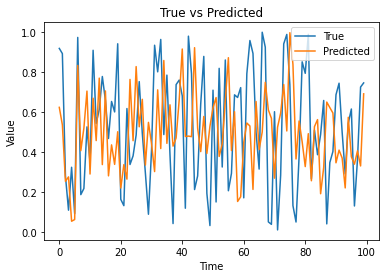

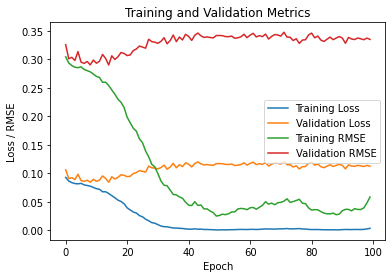

In [45]:
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf

# define the number of time steps in each input sequence
n_steps = 50

# define the number of features in the input sequences
n_features = 3

# define the number of neurons in the RNN layer
n_neurons = 100

# define the number of output values
n_outputs = 1

# define the learning rate for the optimizer
learning_rate = 0.001

# define the number of training epochs
n_epochs = 100

# define the batch size
batch_size = 32

# generate sample data for training and testing
# x_train and x_test are arrays of shape (n_samples, n_steps, n_features)
# y_train and y_test are arrays of shape (n_samples, n_outputs)
# Load and preprocess data

x_train = np.random.rand(1000, n_steps, n_features)
y_train = np.random.rand(1000, n_outputs)
x_test = np.random.rand(100, n_steps, n_features)
y_test = np.random.rand(100, n_outputs)

# define the RNN model
model = Sequential([
    SimpleRNN(n_neurons, activation='relu', input_shape=(n_steps, n_features)),
    Dense(n_outputs)
])

# compile the model with an optimizer, loss function, and evaluation metric
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.RootMeanSquaredError()])

# train the model on the training data
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_test, y_test))

# make predictions on the test data
y_pred = model.predict(x_test)

# plot the predictions against the true values
# plt.figure()
for i in range(n_outputs):
    plt.plot(y_test[:, i], label='True')
    plt.plot(y_pred[:, i], label='Predicted')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('True vs Predicted')
    plt.show()

# plot the loss and RMSE for the training and validation data over the epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss / RMSE')
plt.title('Training and Validation Metrics')
plt.show()


Epoch 1/25
469/469 [==============================] - 4s 5ms/step - loss: 0.0923
Epoch 2/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0168
Epoch 3/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0130
Epoch 4/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0121
Epoch 5/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0116
Epoch 6/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0109
Epoch 7/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0104
Epoch 8/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0101
Epoch 9/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0094
Epoch 10/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0093
Epoch 11/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0088
Epoch 12/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0090
Epoch 13/25
469/469 [====

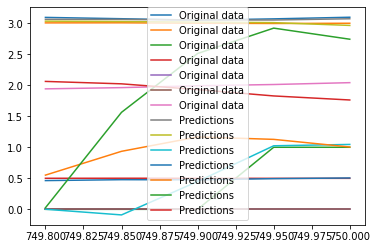

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import pandas as pd
import numpy as np

# Load the data from file
data = pd.read_csv('waterTank_Golden.csv', parse_dates=['time'], index_col='time')
n_steps = 10
n_features = len(data.columns)

# Convert data to a 3D array
X = []
y = []
for i in range(n_steps, len(data)):
    X.append(data.iloc[i-n_steps:i].values)
    y.append(data.iloc[i].values)
X = np.array(X)
y = np.array(y)

# Define the model
model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)),
    SimpleRNN(50, activation='relu'),
    Dense(n_features)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X, y, epochs=25)

# # Use the model to predict future values
# # future_data = data[-n_steps:].values.reshape(1, n_steps, n_features)
# future_data = data.iloc[-n_steps:].values.reshape(1, n_steps, n_features)
# future_prediction = model.predict(future_data)

import matplotlib.pyplot as plt

# Use the model to predict future values
future_data = data.iloc[-n_steps:].values.reshape(1, n_steps, n_features)
predictions = []
for i in range(5):
    # Predict the next value based on the current future data
    prediction = model.predict(future_data)
    # Append the prediction to the list of predictions
    predictions.append(prediction)
    # Update the future data with the new prediction
    future_data = np.concatenate([future_data[:, 1:, :], prediction.reshape(1, 1, n_features)], axis=1)

# Reshape the predictions array
predictions = np.array(predictions).reshape(-1, n_features)

# Get the original data for the predicted time steps
original_data = data.iloc[-len(predictions):]

# Plot the original data and the predicted values
attr = ["Tank1WaterLevel", "Tank2WaterLevel", "Tank1InFlow", "Tank2OutFlow", "wt3_valve", "Tank3OutFlow",  "Tank2.level"]
for i in range(len(attr)):
    
plt.plot(original_data.index, original_data.values, label='Original data')
plt.plot(original_data.index, predictions, label='Predictions')
plt.legend()
plt.show()


In [68]:
predictions.shape

(5, 7)

In [65]:
n_features

4

In [57]:
data = pd.read_csv('trig.csv', header=0, index_col=0)
print(data[-n_steps:])
# future_data = data[-n_steps:].values.reshape(1, n_steps, n_features)
# future_prediction = model.predict(future_data)
#print(len(data.columns))

                sine    cosine   sin(2t)  2sin(t+1)-3cos(t-1)
x                                                            
0.000000    0.000000  1.000000  0.000000             0.062035
0.196350    0.195090  0.980785  0.382683            -0.220830
0.392699    0.382683  0.923880  0.707107            -0.495209
0.589049    0.555570  0.831470  0.923880            -0.750557
0.785398    0.707107  0.707107  1.000000            -0.977061
...              ...       ...       ...                  ...
218.929738 -0.831470  0.555570 -0.923880             1.234948
219.126088 -0.707107  0.707107 -1.000000             1.064792
219.322437 -0.555570  0.831470 -0.923880             0.853717
219.518787 -0.382683  0.923880 -0.707107             0.609834
219.715136 -0.195090  0.980785 -0.382683             0.342516

[1120 rows x 4 columns]


In [62]:
data.iloc[-2:]

,sine,cosine,sin(2t),2sin(t+1)-3cos(t-1)
x,,,,
219.518787,-0.382683,0.923880,-0.707107,0.609834
219.715136,-0.195090,0.980785,-0.382683,0.342516
